In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Import the OpenML Car Dataset from Sklearn Packages

In [3]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [6]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [7]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [8]:
type(car_data)

pandas.core.frame.DataFrame

splitting data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('the Size of training data is :{}\n The size of testing data is : {}'.format(len(train_data),len(test_data)))

the Size of training data is :1209
 The size of testing data is : 519


checking summary statistics

In [10]:
train_data['buying'].value_counts()

buying
med      327
high     307
vhigh    291
low      284
Name: count, dtype: int64

In [11]:
train_data['maint'].value_counts()

maint
high     311
med      311
vhigh    294
low      293
Name: count, dtype: int64

In [12]:
train_data['doors'].value_counts()

doors
5more    319
2        312
4        296
3        282
Name: count, dtype: int64

In [13]:
train_data['persons'].value_counts()

persons
more    418
2       407
4       384
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

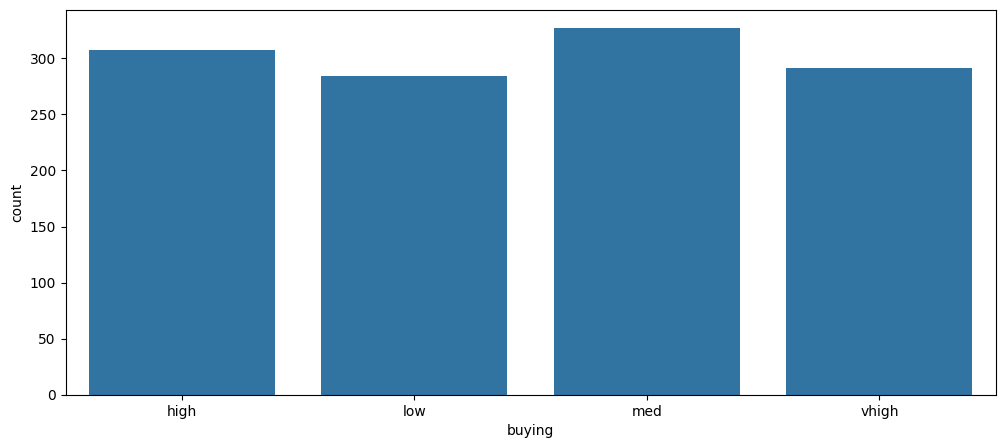

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='maint', ylabel='count'>

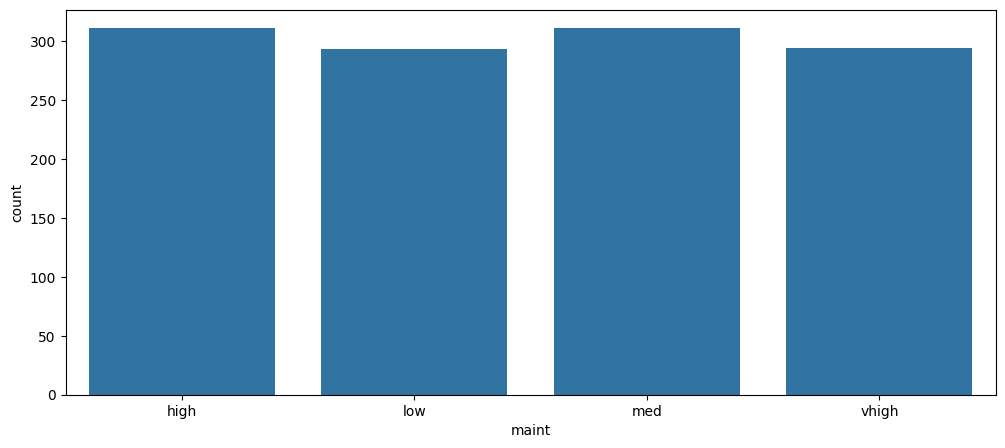

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='maint')

<Axes: xlabel='doors', ylabel='count'>

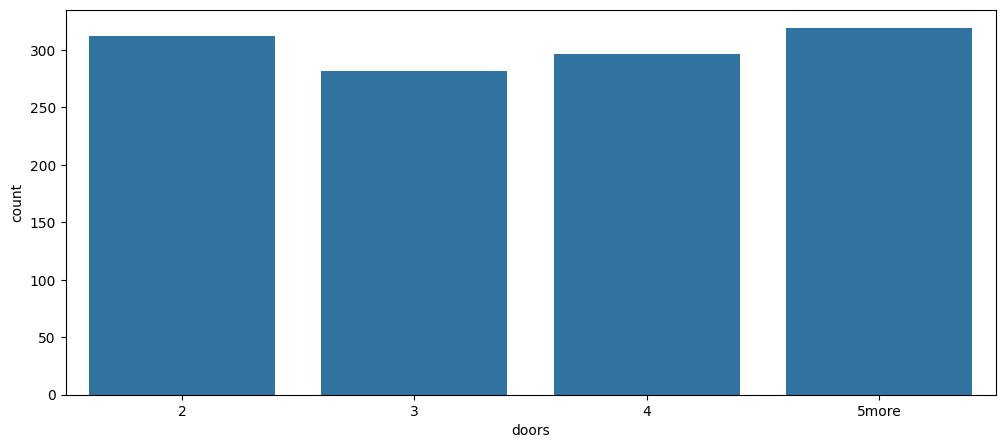

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='doors')

<Axes: xlabel='persons', ylabel='count'>

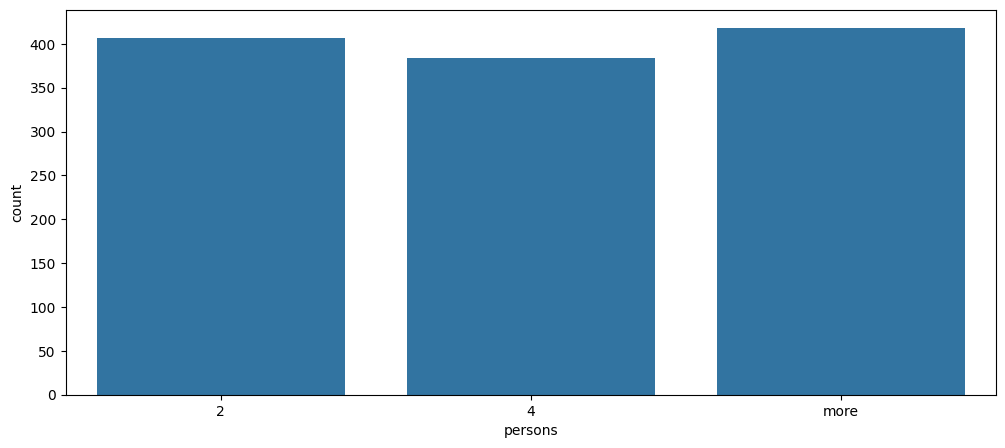

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='persons')

<Axes: xlabel='doors', ylabel='count'>

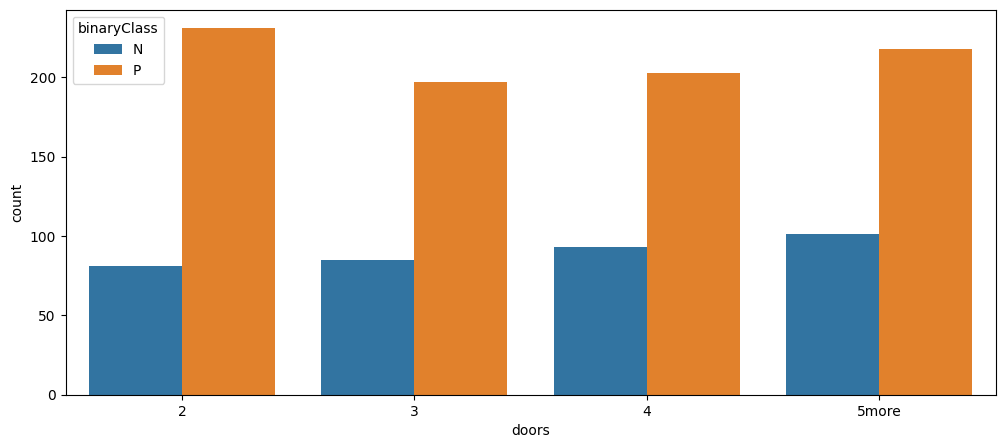

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='doors',hue='binaryClass')

<Axes: xlabel='maint', ylabel='count'>

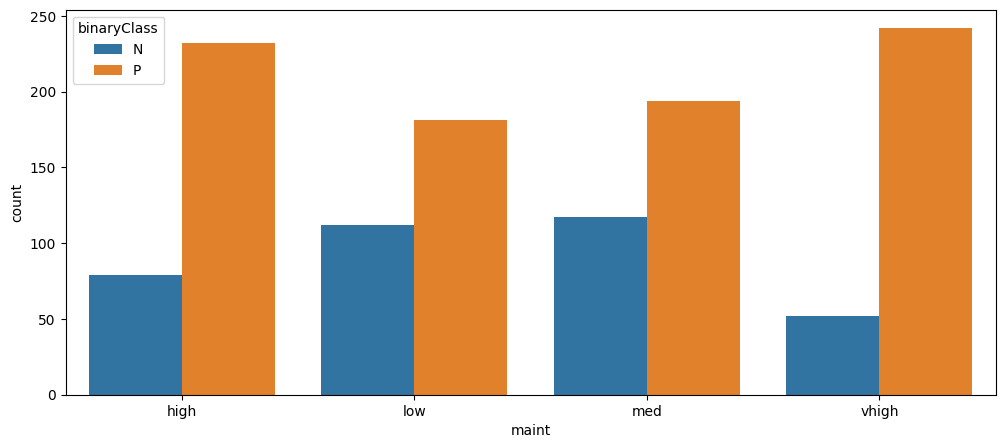

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='maint',hue='binaryClass')

<Axes: xlabel='doors', ylabel='count'>

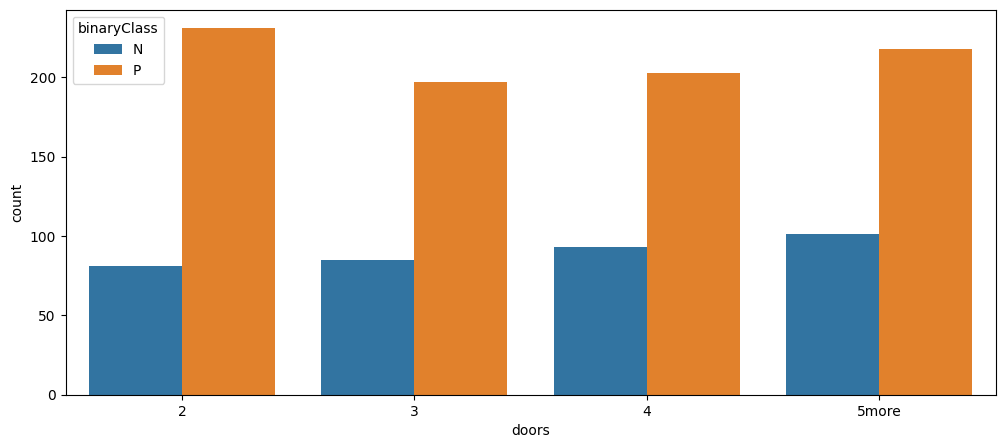

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='doors',hue='binaryClass')

<Axes: xlabel='persons', ylabel='count'>

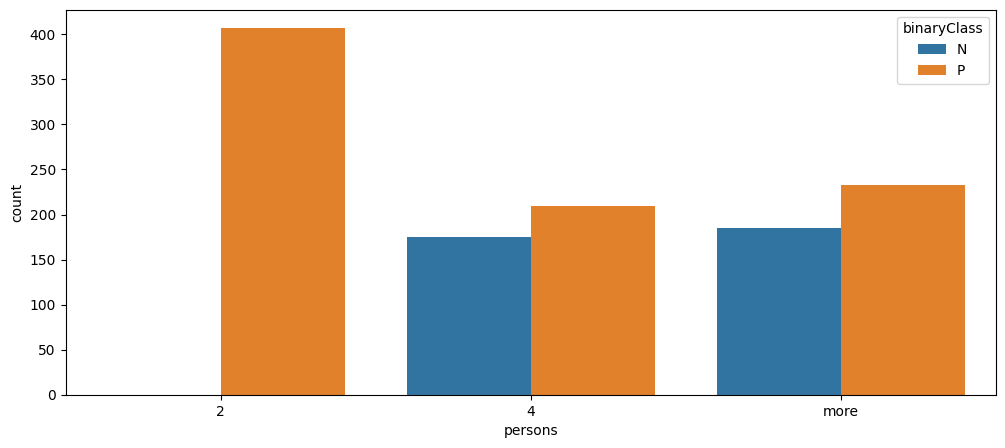

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_data,x='persons',hue='binaryClass')

4-data processing

before handiling categerical feature,let create training input data and lables.

In [30]:
car_train=train_data.drop('binaryClass',axis=1)
car_lables=train_data[['binaryClass']]

create pipeline to encode all feature the training input data

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [31]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_label_prepared=label_enc.fit_transform(car_lables)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5-training descision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_label_prepared)

DecisionTreeClassifier()

evaluation descision tree

In [50]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  pred=model.predict(input_data)
  acc=accuracy_score(labels,pred)
  return acc

In [51]:
from sklearn.metrics import confusion_matrix
def conf_matrix(input_data,model,labels):
  pred=model.predict(input_data)
  cm=confusion_matrix(labels,pred)
  return cm

In [52]:
from sklearn.metrics import classification_report
def class_report(input_data,model,labels):
  pred=model.predict(input_data)
  report=classification_report(labels,pred)
  report=print(report)
  return report

In [53]:
conf_matrix(car_train_prepared,tree_clf,car_label_prepared)

array([[360,   0],
       [  0, 849]])

In [54]:
class_report(car_train_prepared,tree_clf,car_label_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

